 **DEP TASK 3**

In [3]:
pip install snscrape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.5 MB/s eta 0:00:00


In [21]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**DATA COLLECTION USING API & PREPROCESSING**

In [3]:
# Define the Twitter handle and number of tweets to retrieve
twitter_handle = "ImranKhan"
num_tweets = 1000  # Adjust as needed
start_date = "2009-07-22"  # 15 years ago from today
end_date = "2024-07-22"  # Today's date
query = f"from:{twitter_handle} since:{start_date} until:{end_date}"


In [23]:
training_data = pd.read_csv('/content/Tweets.csv')

In [25]:
# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Handle non-string objects
    if not isinstance(text, str):
        text = str(text)  # Convert to string if not already

    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(tokens)
    return processed_text


In [26]:
# Apply preprocessing to the text data
training_data['processed_text'] = training_data['text'].apply(preprocess_text)



**Sentiment Analysis**

In [27]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Apply sentiment analysis to the preprocessed text
training_data['sentiment'] = training_data['processed_text'].apply(analyze_sentiment)

**VISUALIZATION**

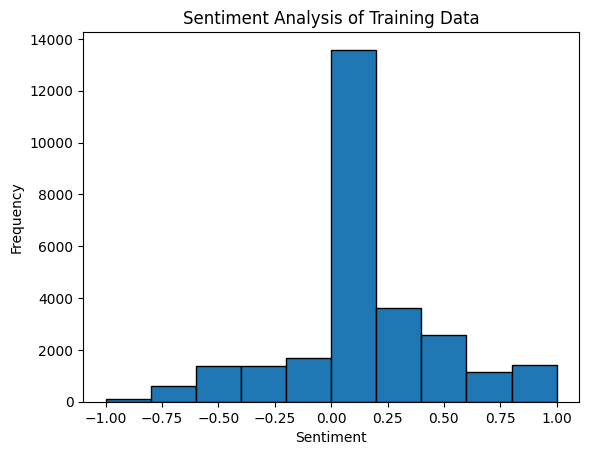

In [32]:
# Plot the sentiment distribution for the
plt.hist(training_data['sentiment'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of frequency')
plt.show()